In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading libraries and data

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/telecom_customer_churn.csv")
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Understanding Of Data and Visualizing missing values





In [ ]:
df=data.copy()

In [ ]:
df.shape

(7043, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

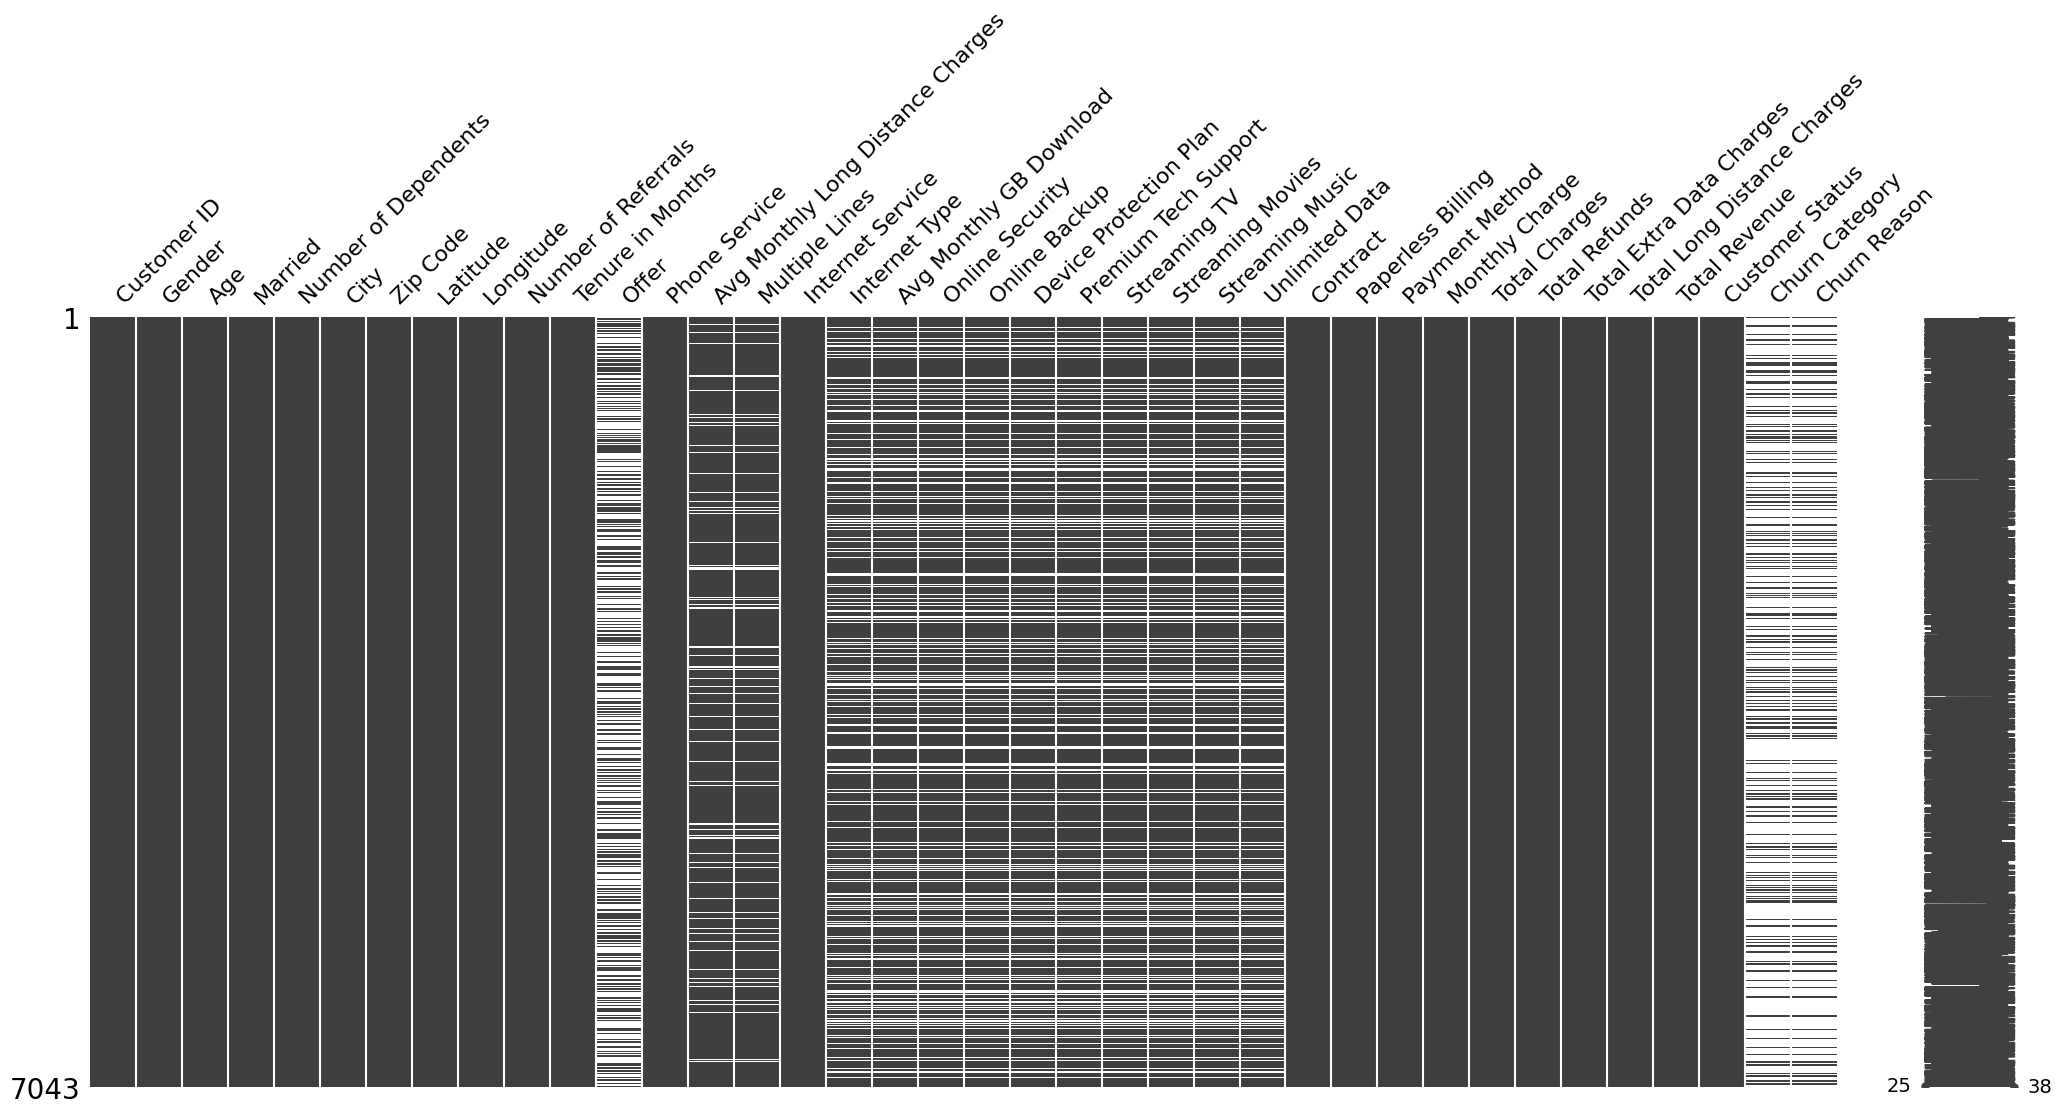

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

In [ ]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

there is data missing in offer,avg monthly long distnace charges,muliple lines, internet type,Avg Monthly GB Download,Online Security         
   Online Backup ,Device Protection Plan,Premium Tech Support Streaming TV     Streaming Movies Streaming Music Unlimited Data,churn category ,churn reason     

# Data Manipulation

In [ ]:
df = df.drop(['Customer ID'], axis = 1)


In [ ]:


# missing_cols = ['Offer', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type',
#                 'Avg Monthly GB Download', 'Online Security', 'Online Backup',
#                 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
#                 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
#                 'Churn Category', 'Churn Reason', 'Customer Status']

# # Replace missing values in specified columns with mean or median
# for col in missing_cols:
#     if col in df.columns:
#         if df[col].dtype == 'object':
#             df[col].fillna("missing", inplace=True)
#         else:
#             df[col].fillna(df[col].mean(), inplace=True)

# # Convert categorical columns to one-hot encoded format
# df_encoded = pd.get_dummies(df, columns=missing_cols)

# # Now, missing values have been handled and categorical columns have been converted to one-hot encoded format
from sklearn.impute import SimpleImputer
numeric_cols = df.select_dtypes(include='number').columns
imputer_numeric = SimpleImputer(strategy='mean')  # You can replace 'mean' with other strategies as needed
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

# Step 4: Impute missing values for categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
imputer_categorical = SimpleImputer(strategy='most_frequent')  # Impute with mode
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])


In [ ]:
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

# Data Visualization

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Customer Status'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

28.4 % of customers switched to another firm.

Customers are 49.5 % female and 50.5 % male.

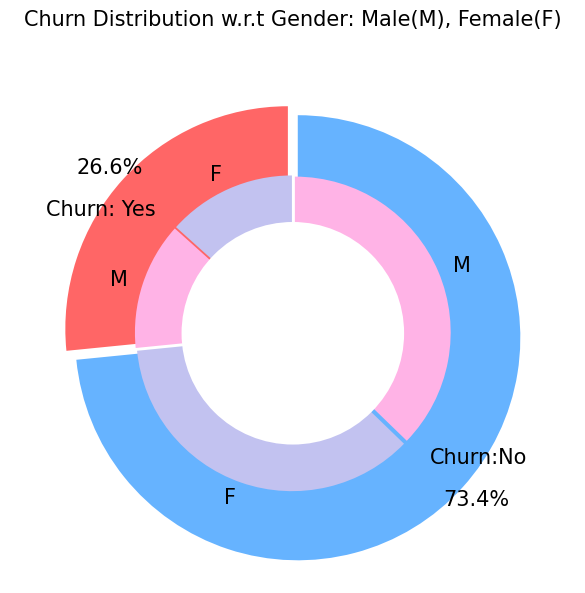

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [ ]:
fig = px.histogram(df, x="Customer Status", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [ ]:
labels = df['Payment Method'].unique()
values = df['Payment Method'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()


In [ ]:
fig = px.histogram(df, x="Customer Status", color="Payment Method", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()


A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.


In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Customer Status", color="Number of Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Customer Status", color="Online Security", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Most customers churn in the absence of online security

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Customer Status", color="Paperless Billing", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers with Paperless Billing are most likely to churn.

In [ ]:
fig = px.histogram(df, x="Customer Status", color="Premium Tech Support",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

customers with no premium tech support as mostly likely to churn

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Customer Status", color="Churn Category", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

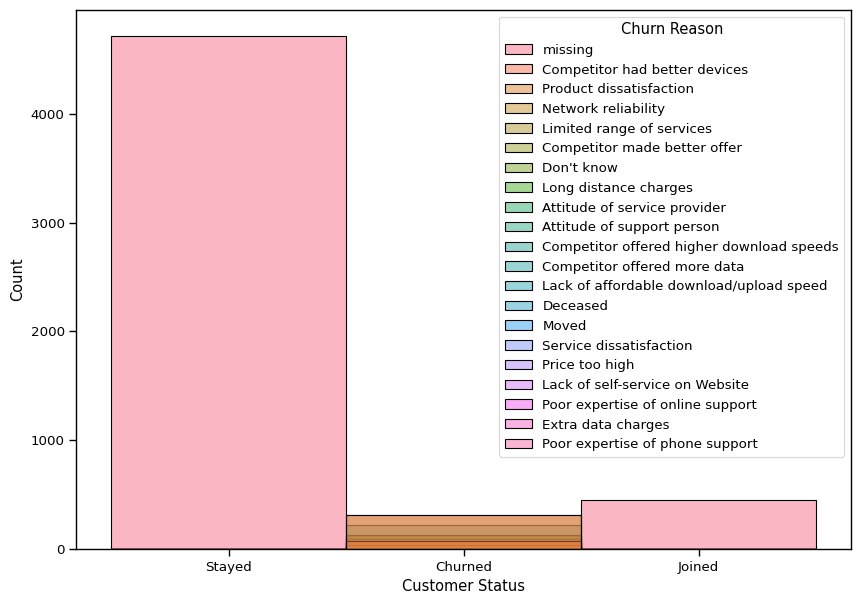

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
plt.figure(figsize=(10,7))
fig = sns.histplot(df, x="Customer Status", hue="Churn Reason")



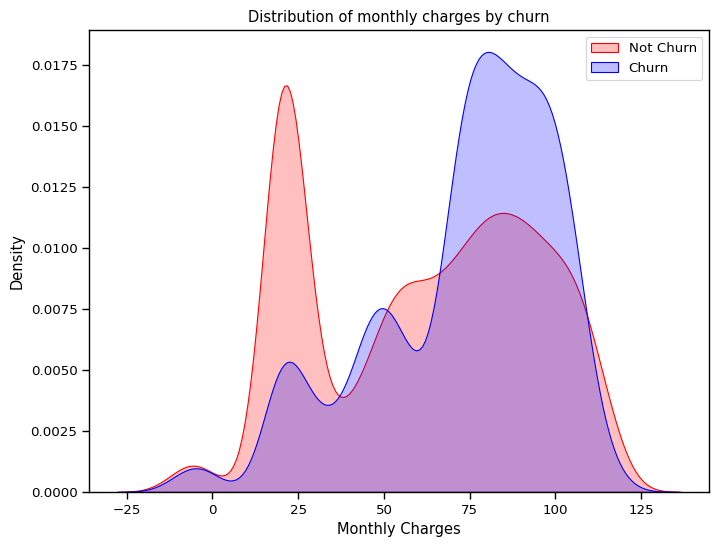

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper", font_scale=1.1)

# Plot kernel density plot for Monthly Charges
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(df['Monthly Charge'][df["Customer Status"] == 'Stayed'],
                 color="Red", shade=True)
ax = sns.kdeplot(df['Monthly Charge'][df["Customer Status"] == 'Churned'],
                 ax=ax, color="Blue", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()


Customers with higher Monthly Charges are also more likely to churn

In [ ]:
fig = px.box(df, x='Customer Status', y = 'Tenure in Months')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

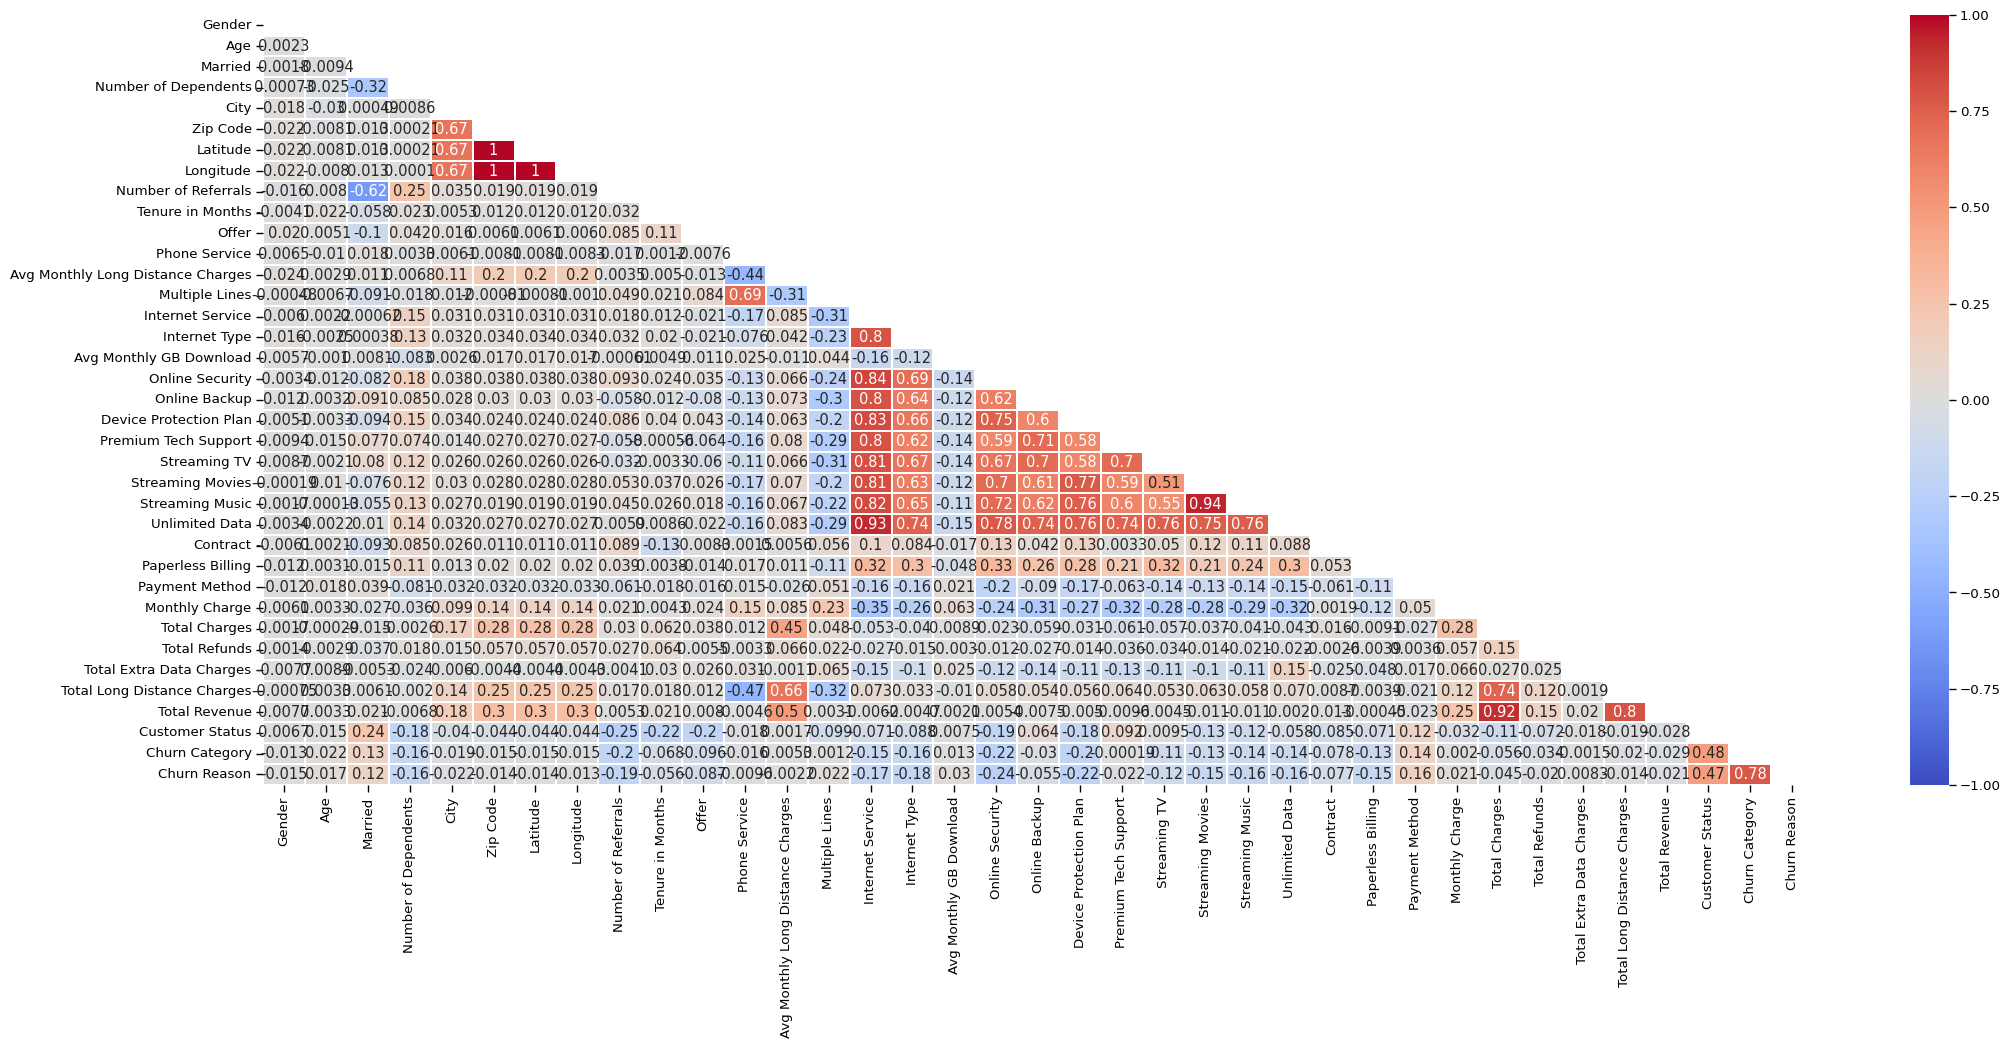

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Data Preprocessing

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Print the names of categorical columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status',
       'Churn Category', 'Churn Reason'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Define the one-hot encoding for 'Customer Status'
customer_status_encoding = {'Stayed': 1, 'Churned': 0,'Joined':-1}

# Apply one-hot encoding to 'Customer Status' column manually
df['Customer Status'] = df['Customer Status'].map(customer_status_encoding)

# Define the remaining categorical columns for one-hot encoding
categorical_columns = ['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method',
       'Churn Category', 'Churn Reason']

# Perform one-hot encoding for the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


    Age  Number of Dependents  Zip Code   Latitude   Longitude  \
0  37.0                   0.0   93225.0  34.827662 -118.999073   
1  46.0                   0.0   91206.0  34.162515 -118.203869   
2  50.0                   0.0   92627.0  33.645672 -117.922613   
3  78.0                   0.0   94553.0  38.014457 -122.115432   
4  75.0                   0.0   93010.0  34.227846 -119.079903   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                  2.0               9.0                              42.39   
1                  0.0               9.0                              10.69   
2                  0.0               4.0                              33.65   
3                  1.0              13.0                              27.82   
4                  3.0               3.0                               7.38   

   Avg Monthly GB Download  Monthly Charge  ...  \
0                     16.0            65.6  ...   
1                     10.0

In [ ]:
df_encoded.head()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,37.0,0.0,93225.0,34.827662,-118.999073,2.0,9.0,42.39,16.0,65.6,...,False,False,False,False,False,False,False,False,False,False
1,46.0,0.0,91206.0,34.162515,-118.203869,0.0,9.0,10.69,10.0,-4.0,...,False,False,False,False,False,False,False,False,False,False
2,50.0,0.0,92627.0,33.645672,-117.922613,0.0,4.0,33.65,30.0,73.9,...,False,False,False,False,False,False,False,False,False,False
3,78.0,0.0,94553.0,38.014457,-122.115432,1.0,13.0,27.82,4.0,98.0,...,False,False,False,False,False,False,False,False,True,False
4,75.0,0.0,93010.0,34.227846,-119.079903,3.0,3.0,7.38,11.0,83.9,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
df_encoded['Customer Status']

0       1
1       1
2       0
3       0
4       0
       ..
7038    1
7039    0
7040   -1
7041    1
7042    1
Name: Customer Status, Length: 7043, dtype: int64

In [ ]:
X = df_encoded.drop(columns = ['Customer Status'],axis=1)
y = df_encoded['Customer Status']

In [ ]:
import pandas as pd

df = pd.DataFrame({'y': y})
missing_values = df.isnull().sum()

print(missing_values)

y    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
print(X.shape)
print(y.shape)

(7043, 1173)
(7043,)


# Machine Learning Model Evaluations and Predictions

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7288215806909607


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

          -1       0.45      0.34      0.39       136
           0       0.51      0.36      0.42       561
           1       0.80      0.91      0.85      1416

    accuracy                           0.73      2113
   macro avg       0.59      0.54      0.55      2113
weighted avg       0.70      0.73      0.71      2113



**SVC**

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.6701372456223379


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       136
           0       0.00      0.00      0.00       561
           1       0.67      1.00      0.80      1416

    accuracy                           0.67      2113
   macro avg       0.22      0.33      0.27      2113
weighted avg       0.45      0.67      0.54      2113



**logitic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)


Logistic Regression accuracy is : 0.7718883104590629


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.51      0.62      0.56       136
           0       0.63      0.44      0.52       561
           1       0.84      0.92      0.87      1416

    accuracy                           0.77      2113
   macro avg       0.66      0.66      0.65      2113
weighted avg       0.76      0.77      0.76      2113



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.9479413156649313


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       136
           0       0.92      0.88      0.90       561
           1       0.96      0.98      0.97      1416

    accuracy                           0.95      2113
   macro avg       0.92      0.92      0.92      2113
weighted avg       0.95      0.95      0.95      2113



# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9252247988641742


# Ada Boost Classifer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.9569332702318978

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

          -1       0.83      1.00      0.91       136
           0       1.00      0.84      0.91       561
           1       0.96      1.00      0.98      1416

    accuracy                           0.96      2113
   macro avg       0.93      0.95      0.93      2113
weighted avg       0.96      0.96      0.96      2113



# Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.9583530525319451


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

          -1       0.85      0.98      0.91       136
           0       0.99      0.85      0.92       561
           1       0.96      1.00      0.98      1416

    accuracy                           0.96      2113
   macro avg       0.93      0.94      0.94      2113
weighted avg       0.96      0.96      0.96      2113



In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.9607193563653573


Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to unde

so gradient boosting classifier, AdaBoost classifier and logistic regression models well predicted the churn
